# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/2/7

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.0/186.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
google-adk 1.23.0 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_Fi

## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


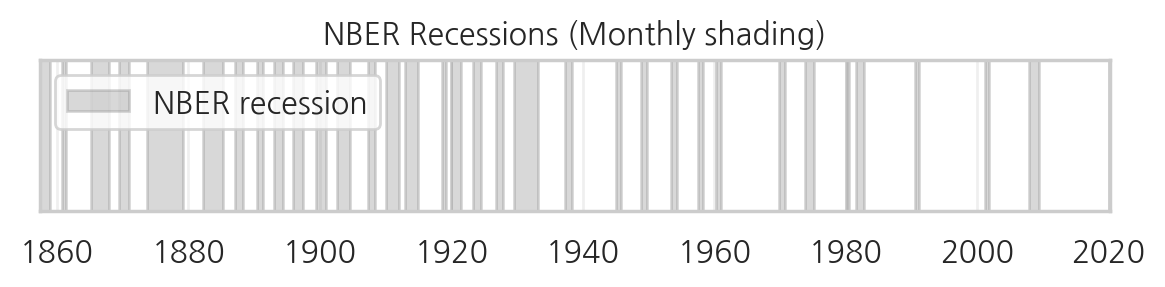

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## 버블의 최근 사례들

|사례|시작년도|데이터 (FRED 데이터 코드)|
|-|:-:|-|
|일본 주식시장|1983|Nikkei Stock Average, Nikkei 225 (NIKKEI225)|
|미국 주식시장의 닷컴버블|1994|NASDAQ Composite Index (NASDAQCOM)|
|금|2001|Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market (GOLDAMGBD228NLBM)|
|미국 주택시장|2001|S&P/Case-Shiller U.S. National Home Price Index (CSUSHPISA)|
|비트코인|2017|Coinbase Bitcoin (CBBTCUSD)|



In [4]:
# 일별 데이터 불러와서 월별로 바꾸고 기준연도 0부터 시작하는 것으로 바꾸기

def FRED_normalize(varname, start, end):
  """
  (docstring)
  varname: variable name
  start: start date
  end: end date
  (1) import varname from start to end from FRED (https://fred.stlouisfed.org/)
  (2) change the frequency of varname to monthly
  (3) normalize the starting date value as zero
  """
  df = pdr.get_data_fred(varname, start=start, end=end)
  df_monthly = df.resample('ME').mean()
  df_monthly = 100*(df_monthly / df_monthly.iloc[0])-100
  df_monthly.reset_index(inplace=True)
  df_monthly = df_monthly.drop(['DATE'], axis=1)

  return df_monthly

In [5]:
# 일본 주식시장
varname = ['NIKKEI225']
start = '1983/1/1'
end = '1993/12/31'

japan = FRED_normalize(varname, start, end)

# 미국 주식시장
varname = ['NASDAQCOM']
start = '1994/1/1'
end = '2004/12/31'

us_stock = FRED_normalize(varname, start, end)

# 미국 주택시장
varname = ['CSUSHPISA']
start = '2001/1/1'
end = '2011/12/31'

us_housing = FRED_normalize(varname, start, end)

# 금
varname = ['PCU2122212122210']
#varname = ['GOLDAMGBD228NLBM']
start = '2001/1/1'
end = '2011/12/31'

gold = FRED_normalize(varname, start, end)

# 비트코인
varname = ['CBBTCUSD']
start = '2017/1/1'
end = '2021/4/15'

bitcoin = FRED_normalize(varname, start, end)

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/bubble_episodes.png


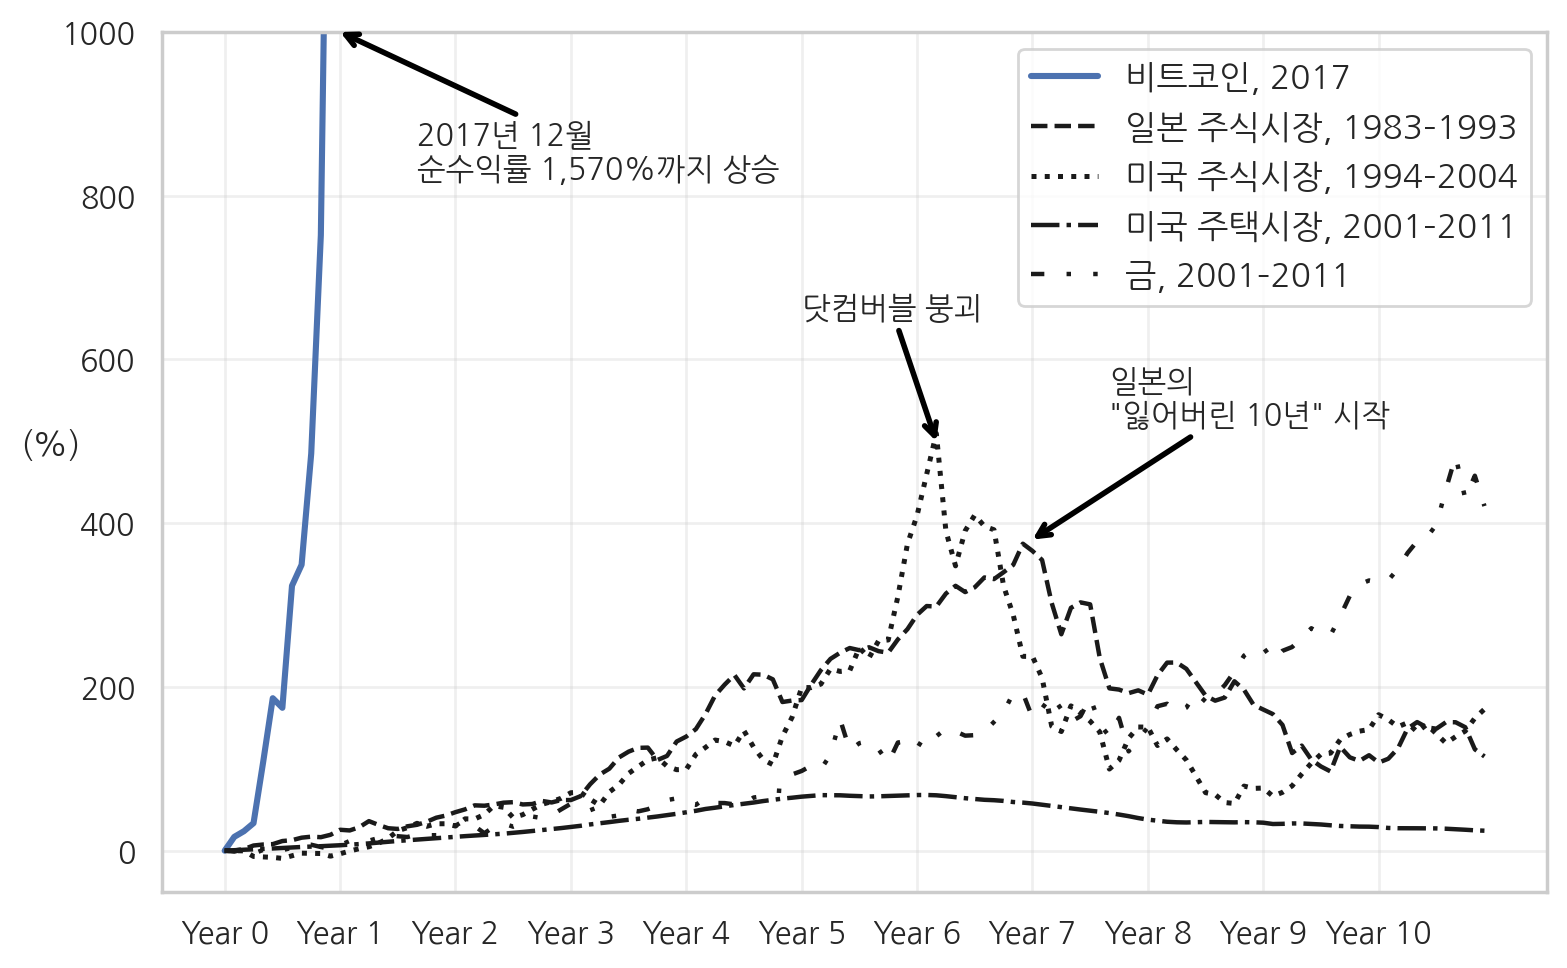

In [8]:
fig, ax = plt.subplots(figsize=(8,5))

# -----------------------------
# Lines
# -----------------------------
ax.plot(bitcoin.iloc[:12], label="비트코인, 2017", linewidth=2.2)
ax.plot(japan, label="일본 주식시장, 1983–1993", linestyle='--', color='k', linewidth=1.6)
ax.plot(us_stock, label="미국 주식시장, 1994–2004", linestyle=':', color='k', linewidth=1.8)
ax.plot(us_housing, label="미국 주택시장, 2001–2011", linestyle='-.', color='k', linewidth=1.6)
ax.plot(gold, label="금, 2001–2011",
        linestyle=(0, (3, 5, 1, 5, 1, 5)), color='k', linewidth=1.6)

# -----------------------------
# Axes
# -----------------------------
ax.set_ylim(-50, 1000)
ax.set_ylabel('(%)', rotation=0)
ax.legend(fontsize=12)

ax.set_xticks([0,12,24,36,48,60,72,84,96,108,120])
ax.set_xticklabels(
    ['Year 0','Year 1','Year 2','Year 3','Year 4',
     'Year 5','Year 6','Year 7','Year 8','Year 9','Year 10']
)

# -----------------------------
# Arrow style (박스 없음)
# -----------------------------
arrow_style = dict(
    arrowstyle="->",
    color="black",
    linewidth=2.0,
    shrinkA=0,
    shrinkB=0
)

# -----------------------------
# Annotations (bbox 제거)
# -----------------------------
ax.annotate(
    '2017년 12월\n순수익률 1,570%까지 상승',
    xy=(12, 1000),
    xytext=(20, 820),
    arrowprops=arrow_style,
    fontsize=11
)

ax.annotate(
    '닷컴버블 붕괴',
    xy=(74, 500),
    xytext=(60, 650),
    arrowprops=arrow_style,
    fontsize=11
)

ax.annotate(
    '일본의\n"잃어버린 10년" 시작',
    xy=(84, 380),
    xytext=(92, 520),
    arrowprops=arrow_style,
    fontsize=11
)

# -----------------------------
# Grid & save
# -----------------------------
ax.grid(True, alpha=0.3)
save_fig('bubble_episodes')
plt.show()

## 비트코인 가격

In [9]:
bitcoin_mdate = pdr.get_data_fred('CBBTCUSD', start='20170101', end='20250629')
bitcoin_mdate = bitcoin_mdate.resample('ME').mean()
bitcoin_mdate['net return'] = 100*bitcoin_mdate / bitcoin_mdate.iloc[0] -100

In [10]:
print("2017년 중 월별 최고 가격 및 순수익률:", bitcoin_mdate.loc[bitcoin_mdate.loc[:'2017','net return'].idxmax()])
print('\n')
print("2018년 이후 월별 최저 가격 3개:", bitcoin_mdate.loc['2018':].CBBTCUSD.nsmallest(3))
print('\n')
print("2017년 이후 월별 최고 가격 및 순수익률:", bitcoin_mdate.loc[bitcoin_mdate.loc[:,'net return'].idxmax()])

2017년 중 월별 최고 가격 및 순수익률: CBBTCUSD     15,271.365
net return    1,569.835
Name: 2017-12-31 00:00:00, dtype: float64


2018년 이후 월별 최저 가격 3개: DATE
2019-02-28   3,659.232
2019-01-31   3,659.426
2018-12-31   3,660.894
Freq: -1ME, Name: CBBTCUSD, dtype: float64


2017년 이후 월별 최고 가격 및 순수익률: CBBTCUSD     105,833.601
net return    11,472.291
Name: 2025-06-30 00:00:00, dtype: float64


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/bitcoin_returns.png


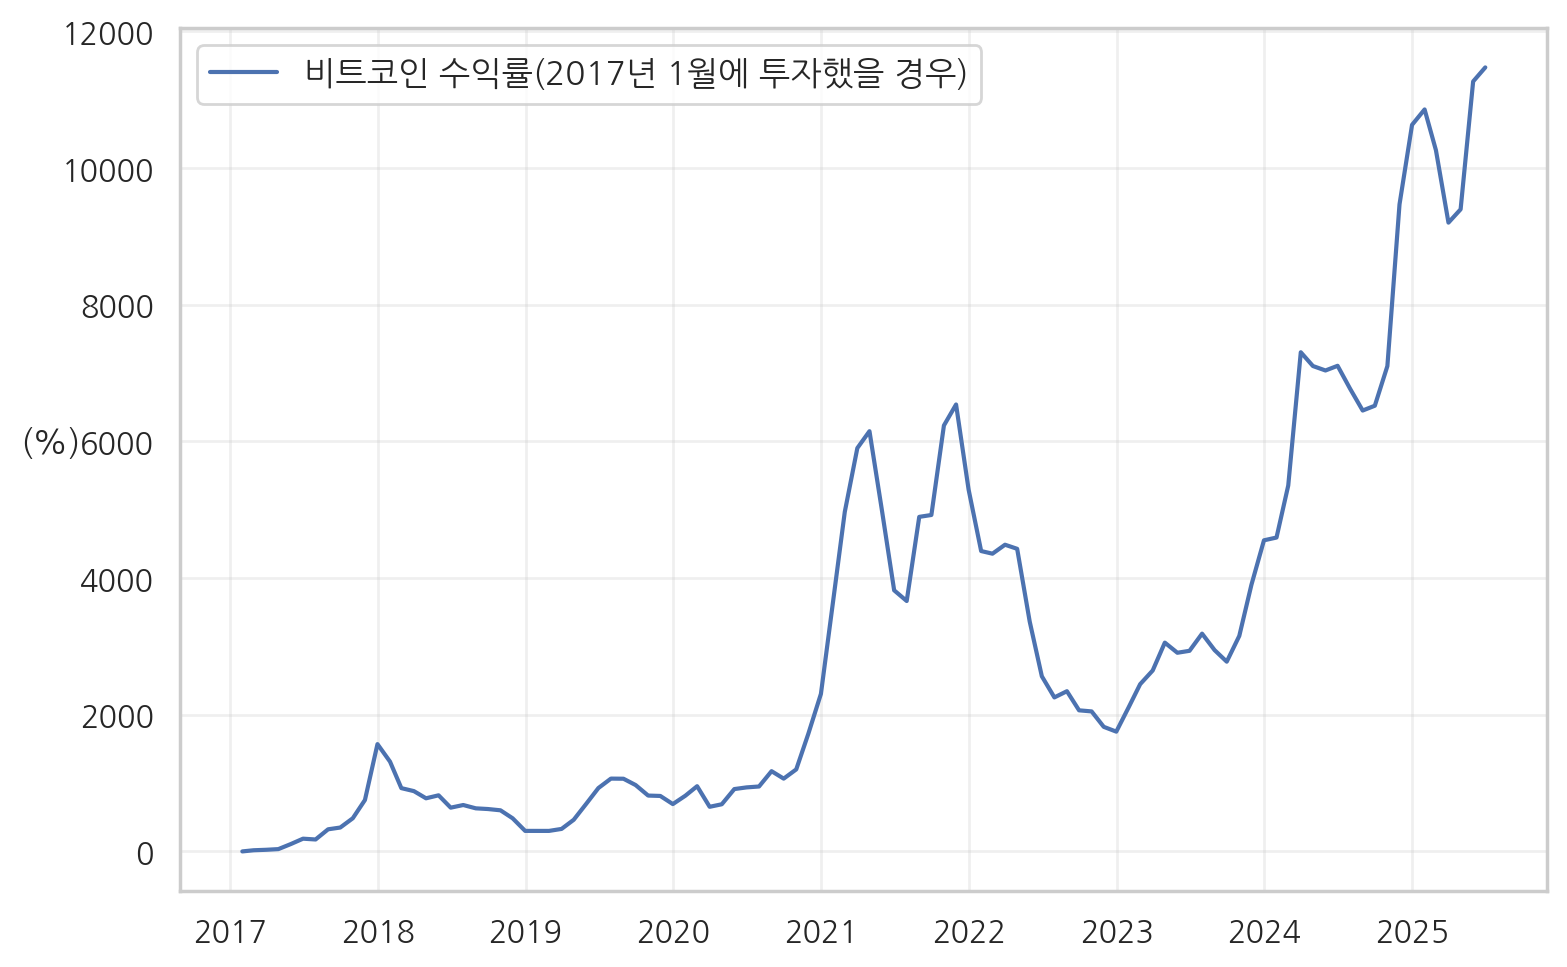

In [11]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(bitcoin_mdate['net return'], label = '비트코인 수익률(2017년 1월에 투자했을 경우)', linestyle='solid')

ax.legend(prop={'size': 12})
ax.set_ylabel('(%)', rotation=0)
ax.grid(True)

save_fig('bitcoin_returns')
plt.show()

## 비트코인과 주식 수익률의 변동성 비교

In [12]:
bitcoin_sp500 = pdr.get_data_fred(['CBBTCUSD','SP500'], start='20170101', end='20250629')
bitcoin_sp500 = bitcoin_sp500.resample('ME').mean()
bitcoin_sp500_returns = 100*bitcoin_sp500.pct_change().dropna()

<Axes: xlabel='DATE'>

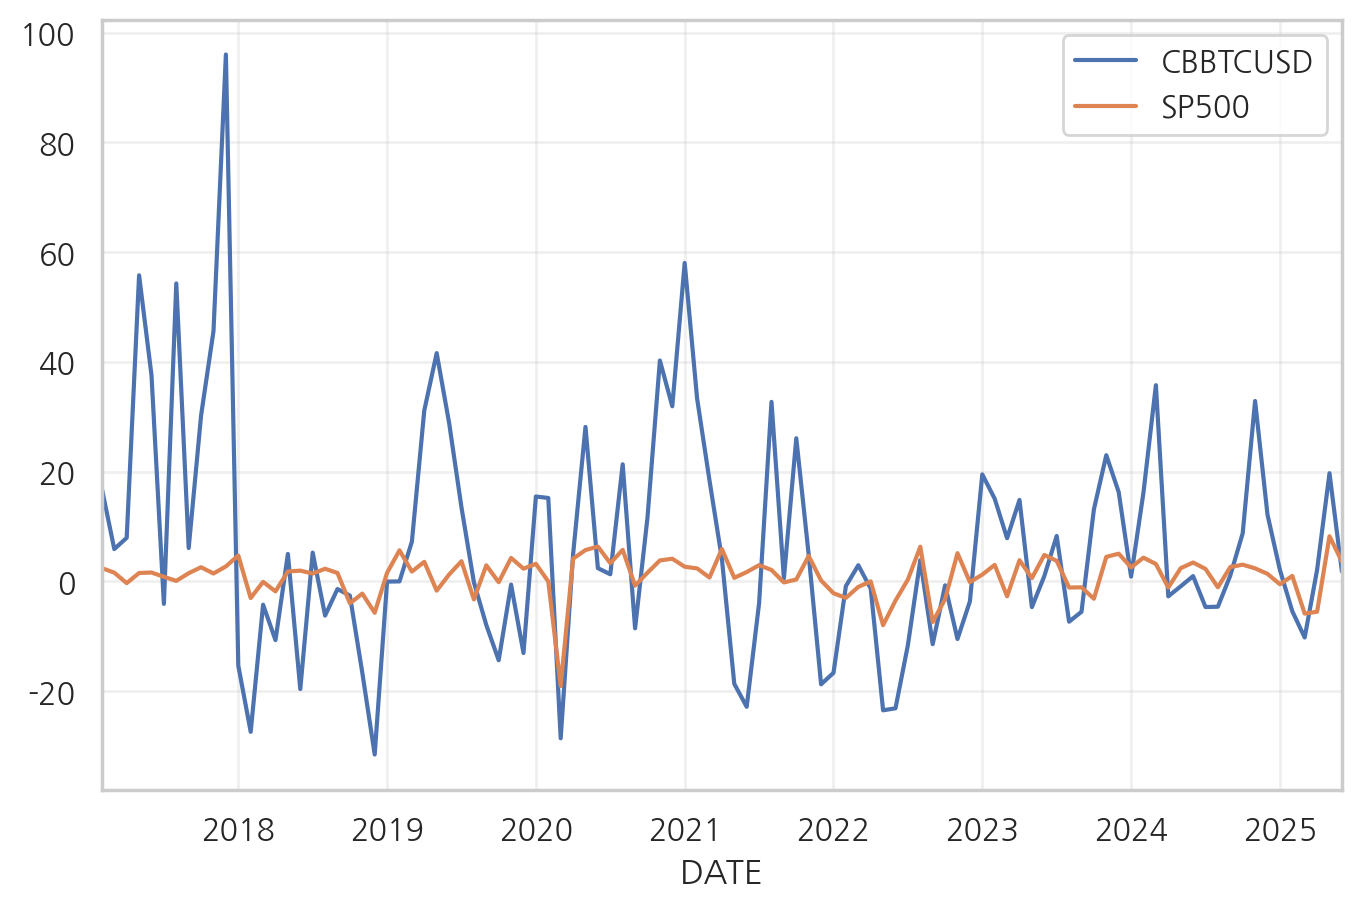

In [13]:
# 비트코인, S&P500 월별 수익률의 시계열

bitcoin_sp500_returns.plot()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/bitcoin_boxplot.png


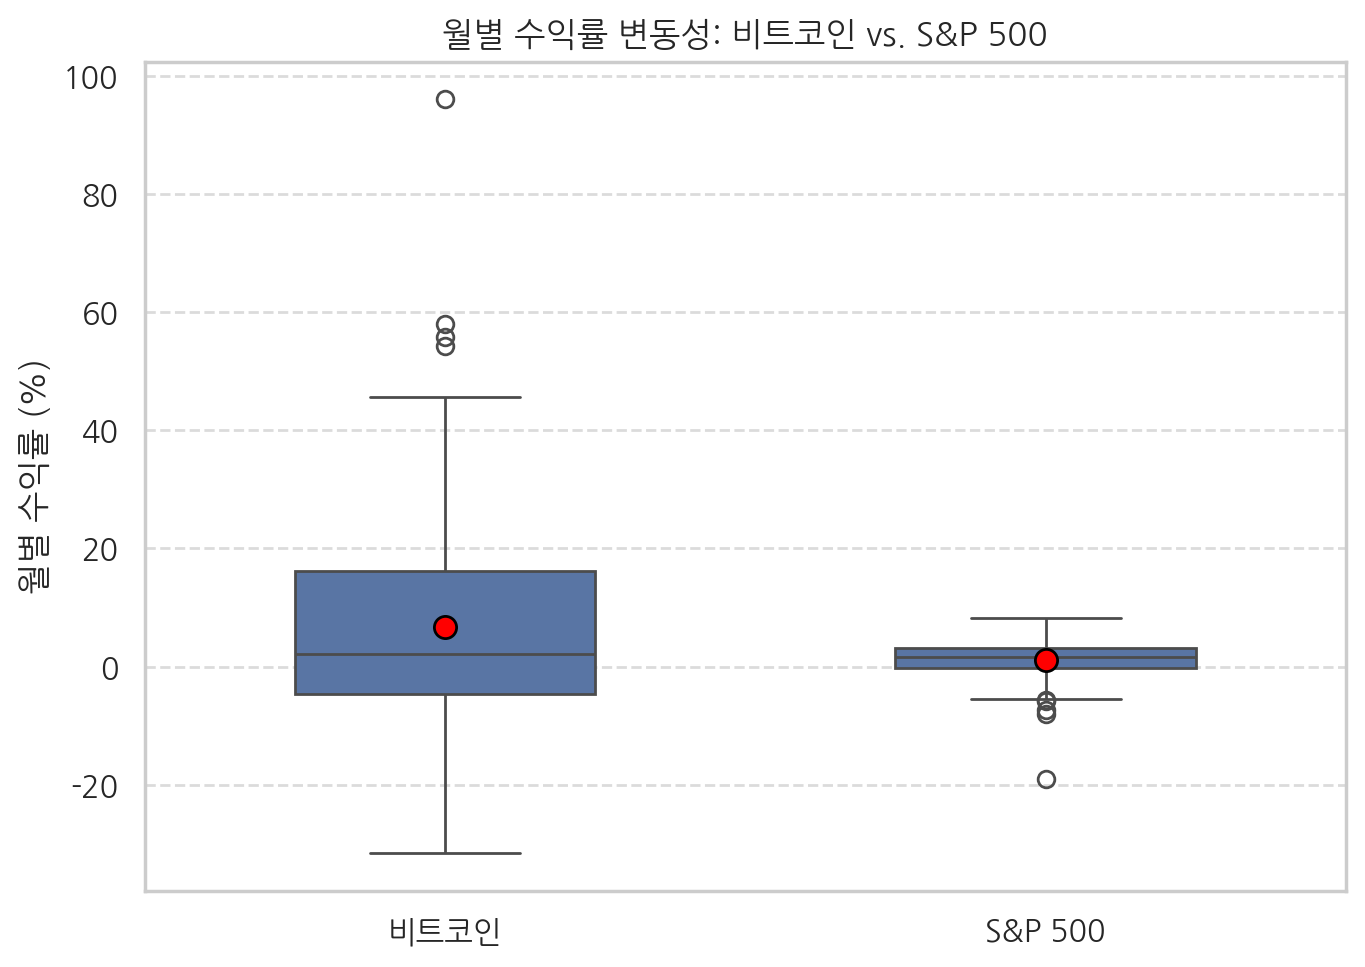

In [15]:
# 비트코인, S&P500 수익률의 boxplot

import seaborn as sns

# 컬럼명을 보기 좋게 바꾸기
bitcoin_sp500_returns.columns = ['비트코인', 'S&P 500']

# long format
df_long = bitcoin_sp500_returns.reset_index().melt(id_vars='DATE', var_name='Asset', value_name='Monthly Return')

plt.figure(figsize=(7,5))
sns.boxplot(x='Asset', y='Monthly Return', data=df_long, notch=False, width=0.5, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"red",
                       "markeredgecolor":"black",
                       "markersize":"8"})

plt.title('월별 수익률 변동성: 비트코인 vs. S&P 500')
plt.ylabel('월별 수익률 (%)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

save_fig('bitcoin_boxplot')
plt.show()